In [1]:
#Lesson 1: What is Deep Learning?
#trains deep neural networks, inspired by biological neural networks. Used to learn from observational
#data. 

#basic form of a neural network is a perceptron. Perceptron recieves input nodes and transfers the appropirate
#output. 

In [2]:
#Lesson 2: Creating a Dataset
import torch
import numpy as np
#to plot our dataset
import matplotlib.pyplot as plt
#sklearn allows access to many different datasets directly from sklearn (prepreared). sklearn create linearly spearpatble dataset.
#torch will then be used to make a perceptron based neural netowrk. Then use the perceptron to train to fit the dataset
#to separate dataset into 2 discrete classes, using gradient descent
import torch.nn as nn
from sklearn import datasets #create linearly seperable dataset


In [3]:
#define number of datapoints
n_points = 100
#import a cluster of data points centered around a chosen point. can also select what center. 
#need to make a nested list that is the coordinate of the center
centers = [[-0.5, 0.5], [0.5, -0.5]] #two clusters centered on [-0.5, 0.5] and [0.5, -0.5]

#each data point will have its corresponding label. So to train the model to classify the data
#random_state is the seed for the random number generator
#cluster_std = standard deviation of the points generated
x, y = datasets.make_blobs(n_samples=n_points, random_state=123, centers=centers, cluster_std=0.4)

#prints numpy array x = 2D numpy array, y = 0. and 1, category of clusters
print(x)
print(y)


x_data = torch.Tensor(x) #makes the x (numpy) into a tensor
y_data = torch.Tensor(y.reshape(100, 1)) #depreication error so need to reshape the data size

[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264  -0.57758555]
 

In [4]:
def scatter_plot():
#do a boolean check. plots the top region of the dataset. 
    plt.scatter(x[y==0, 0], x[y==0, 1])
#plots the bottom region of the dataset (correspond to labels of 1). x and y are in numpy arrays
#to train a nueral model, we need them in tensors (x_data, y_data) Right now they're numpy arrays. 
    plt.scatter(x[y==1, 0], x[y==1, 1])

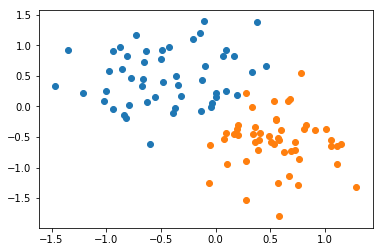

In [5]:
scatter_plot()

In [6]:
#Lesson 3: Perceptron Model 
#based on previously labeled data we can have a trend that has cluster. Diabetic vs non-diabetic patients
#machine will start with a random model, but then trained through optimization until it can classify data better

#Use previously labeled data to come up with a predictive model that can classify data into 2 categories
#then the model can predict NEW data. Computer knows to make this linear model because it calculates
#the errors associated with the model - with a continuous error function E

#error function E is going to assign misidentified point a large penalty and correctly identified with a small penalty
#Then move in the line until the error is even smaller. Minimize error while adjusting linear model - sigmoid function 

#cross entropy - assigns higher likelyhood for those highest probability with positive points and 
#lowest probability with those in the negative region too. P(red) = 1 - P(blue) 
#summation of each probability, such that the lowest cross entropy label will give smallest value 

#Use gradient descent to minimize the error, and does this with many iterations, until the we obtain with optimal parameters
#one trained, we can use model to make accurate model (say a linear model). 
#The model is placed into a node, with x1 and x2 (or y) in the input mode. x1 multiplied by weight 1 and x2 * weight 2
#then bias mode * weight 12 or whatever it is. 
#Take a linear combination to get a value, convert to a probability by passing through a sigmoid function!!

#can clearly see the probability from the inputted data that's labeled. 

#Perceptron = 1 input and 1 output layer, no hidden layers



In [7]:
#Lesson 4: Model Setup
#initialize linear model with a model class inherit from nn.Module - Also need to import torch.nn as nn for this to work
class Model(nn.Module):
    #to initialize new instances of class. Self = instance of class.
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    #to make a prediction, need to pass in the inputs
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x)) #prediction is what comes out of x, passed through linear model and apply sigmoid to convert value to probability
        return pred
    
    #prediction function to return a class
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0 

In [8]:
#seed the random number generator to get same random number
torch.manual_seed(2)

#model
model = Model(2, 1)
print(list(model.parameters()))

#get a two values for weights w1, w2, and a bias
#not optimal parameters, need to train the model still 

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [9]:
#unpack/extract model paramters into a list of two elements
[w, b] = model.parameters()

#to look at w's as a tuple instead
w1, w2 = w.view(2)

#bias is a single value
b1 = b[0]
#print(w1, w2, b1) #they're tensor types

#make everything into a function to return the w1, w2, and b
def get_params():
    return (w1.item(), w2.item(), b1.item()) #the .item will give a python number from all tensor values

In [11]:
def plot_fit(title):
    plt.title = title
    
    #x2 is just the y value, which we need to isolate to plot our graph
    #0 = w1x1 + w2x2 + b
    w1, w2, b1 = get_params() #to pull the parameters from our function
    
    #array is compatible with pyplot
    x1 = np.array([-2.0, 2.0]) #numerical expression for x1, with the x axis going from -2, to 2
    
    x2 = (w1*x1 + b1)/(-w2) #isolate the x2 value, equation of our line
    plt.plot(x1, x2, 'r') #plotting model as a red line
    scatter_plot() #also plot scatter plot of our data
    

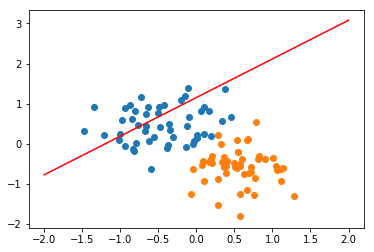

In [12]:
plot_fit('Initial Model')
#not great line to fit data. So need to implment gradient descent to train our model

In [13]:
#Lesson 5: Model Training
#need to train the model to optimize the weight and bias parameters to fit data. 
#Criterion is cross entropy. Loss function is
#going to be used with binary cross entropy (BCELoss) loss function. from the nn modeule 
criterion = nn.BCELoss()

#stochastic gradient descent = SGD. 
#1st compute error of based on cross entropy criterion
#then take gradient (derivative) of the error
#subtract derivative from parameter values of weight and bias, updates in direction of least bias
#lr = learning rates
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [14]:
epochs = 1000 #a single cycle or iteration through the dataset
losses = [] #to visualize the loss decrease over time
for i in range(epochs):
    #every point in x, use x1 and x2, use current model with the forward method
    y_pred = model.forward(x_data) #make a prediction with the forward prediction. NEEDS TO BE A TENSOR
    loss = criterion(y_pred, y_data) #calculate loss by comparing the predicted y with the acutual y values
    print("epoch:", i, "loss", loss.item()) #the loss value associated with each epoch, should decrease over time
    
    losses.append(loss.item()) #appending the loss value after each iteration to visualize the decrease, see improvements
    optimizer.zero_grad() #need to set grad to zero. Gradient accumulates in the backwards call. 
    loss.backward() #computes the gradient
    optimizer.step() #

epoch: 0 loss 0.6185115575790405
epoch: 1 loss 0.6174640655517578
epoch: 2 loss 0.6164200305938721
epoch: 3 loss 0.6153795123100281
epoch: 4 loss 0.6143423318862915
epoch: 5 loss 0.6133086681365967
epoch: 6 loss 0.612278401851654
epoch: 7 loss 0.6112514734268188
epoch: 8 loss 0.6102280020713806
epoch: 9 loss 0.6092078685760498
epoch: 10 loss 0.6081911325454712
epoch: 11 loss 0.607177734375
epoch: 12 loss 0.6061676740646362
epoch: 13 loss 0.6051609516143799
epoch: 14 loss 0.604157567024231
epoch: 15 loss 0.6031573414802551
epoch: 16 loss 0.602160632610321
epoch: 17 loss 0.6011670231819153
epoch: 18 loss 0.6001767516136169
epoch: 19 loss 0.5991896986961365
epoch: 20 loss 0.5982059240341187
epoch: 21 loss 0.5972253680229187
epoch: 22 loss 0.5962480306625366
epoch: 23 loss 0.5952739119529724
epoch: 24 loss 0.5943029522895813
epoch: 25 loss 0.5933352112770081
epoch: 26 loss 0.5923705697059631
epoch: 27 loss 0.5914091467857361
epoch: 28 loss 0.5904508233070374
epoch: 29 loss 0.58949565887451

epoch: 293 loss 0.41714343428611755
epoch: 294 loss 0.41670548915863037
epoch: 295 loss 0.41626864671707153
epoch: 296 loss 0.4158329665660858
epoch: 297 loss 0.41539841890335083
epoch: 298 loss 0.4149649441242218
epoch: 299 loss 0.4145326316356659
epoch: 300 loss 0.41410136222839355
epoch: 301 loss 0.41367119550704956
epoch: 302 loss 0.4132421910762787
epoch: 303 loss 0.41281425952911377
epoch: 304 loss 0.4123874306678772
epoch: 305 loss 0.4119615852832794
epoch: 306 loss 0.41153690218925476
epoch: 307 loss 0.41111332178115845
epoch: 308 loss 0.4106908142566681
epoch: 309 loss 0.4102693498134613
epoch: 310 loss 0.4098489284515381
epoch: 311 loss 0.4094295799732208
epoch: 312 loss 0.4090113043785095
epoch: 313 loss 0.4085941016674042
epoch: 314 loss 0.40817791223526
epoch: 315 loss 0.4077627956867218
epoch: 316 loss 0.40734875202178955
epoch: 317 loss 0.4069356918334961
epoch: 318 loss 0.4065236747264862
epoch: 319 loss 0.40611276030540466
epoch: 320 loss 0.40570276975631714
epoch: 321

epoch: 527 loss 0.3385051488876343
epoch: 528 loss 0.33824828267097473
epoch: 529 loss 0.33799201250076294
epoch: 530 loss 0.33773624897003174
epoch: 531 loss 0.33748096227645874
epoch: 532 loss 0.3372262120246887
epoch: 533 loss 0.3369719684123993
epoch: 534 loss 0.33671826124191284
epoch: 535 loss 0.3364650309085846
epoch: 536 loss 0.33621227741241455
epoch: 537 loss 0.3359600901603699
epoch: 538 loss 0.335708349943161
epoch: 539 loss 0.33545711636543274
epoch: 540 loss 0.33520641922950745
epoch: 541 loss 0.33495619893074036
epoch: 542 loss 0.33470648527145386
epoch: 543 loss 0.33445724844932556
epoch: 544 loss 0.33420851826667786
epoch: 545 loss 0.3339603543281555
epoch: 546 loss 0.33371254801750183
epoch: 547 loss 0.3334652781486511
epoch: 548 loss 0.3332185447216034
epoch: 549 loss 0.3329722583293915
epoch: 550 loss 0.33272644877433777
epoch: 551 loss 0.33248114585876465
epoch: 552 loss 0.33223631978034973
epoch: 553 loss 0.331991970539093
epoch: 554 loss 0.3317481279373169
epoch:

epoch: 889 loss 0.2702646553516388
epoch: 890 loss 0.27012622356414795
epoch: 891 loss 0.2699880301952362
epoch: 892 loss 0.2698500156402588
epoch: 893 loss 0.2697122097015381
epoch: 894 loss 0.2695746123790741
epoch: 895 loss 0.26943719387054443
epoch: 896 loss 0.2692999541759491
epoch: 897 loss 0.26916301250457764
epoch: 898 loss 0.2690261900424957
epoch: 899 loss 0.26888954639434814
epoch: 900 loss 0.2687531113624573
epoch: 901 loss 0.2686169147491455
epoch: 902 loss 0.2684808671474457
epoch: 903 loss 0.26834502816200256
epoch: 904 loss 0.2682093679904938
epoch: 905 loss 0.2680739462375641
epoch: 906 loss 0.26793867349624634
epoch: 907 loss 0.2678036391735077
epoch: 908 loss 0.26766878366470337
epoch: 909 loss 0.2675341069698334
epoch: 910 loss 0.2673996388912201
epoch: 911 loss 0.26726534962654114
epoch: 912 loss 0.2671312391757965
epoch: 913 loss 0.266997367143631
epoch: 914 loss 0.2668636441230774
epoch: 915 loss 0.2667301297187805
epoch: 916 loss 0.2665967643260956
epoch: 917 lo

Text(0.5,0,'epoch')

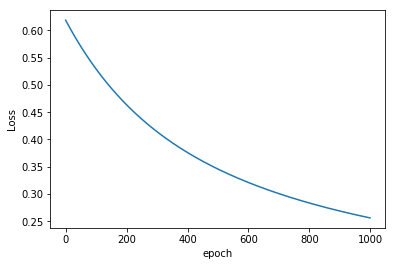

In [15]:
#visualize the loss on a graph, has more room to converge. Cover later
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

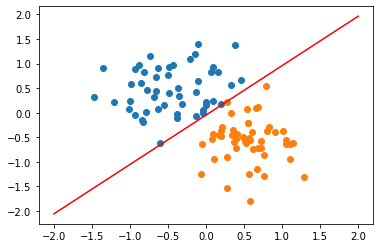

In [15]:
plot_fit("Trained Model") #see how well the new model fits the data

In [16]:
#Lesson 6: Model Testing
#now trained a model, now can make accurate predictions with new data that is not labeled

Red point positive probability = 0.9424158334732056
Black point positive probability = 0.05055497586727142
Red point belongs in class 1
Black point belongs in class 0


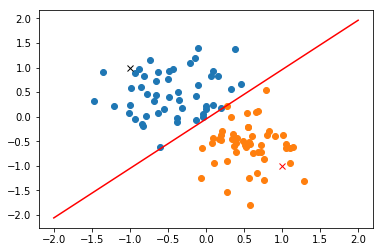

In [16]:
#initializing a random points
point1 = torch.Tensor([1.0, -1.0]) #two inputs, x1 and x2
point2 = torch.Tensor([-1.0, 1.0])

#coloring the points and visualizing the points in the data
plt.plot(point1.numpy()[0], point1.numpy()[1], 'rx') #point needs to be a numpy array for plotting
plt.plot(point2.numpy()[0], point2.numpy()[1], 'kx')

#has probability close to 1
print("Red point positive probability = {}".format(model.forward(point1).item())) #calculating the predicted positive probability with forward function

#has probability close to 0
print("Black point positive probability = {}".format(model.forward(point2).item()))

print("Red point belongs in class {}".format(model.predict(point1))) #prediction function
print("Black point belongs in class {}".format(model.predict(point2)))
plot_fit("Trained Model")